<font size=6><b> lec03.머신러닝_전처리 : 스케일링(Scaling)

### 스케일링(Scaling)
* 데이터의 값이 너무 크거나 작아 변수의 영향이 제대로 반영되지 않을 경우, 알고리즘의 계산 과정에서 0으로 수렴하거나 값이 너무 커져버리는 경우 값의 수치를 변환해 사용
* StandardScaler()
* MinMaxScaler()
* RobustScaler()

In [1]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 스케일링

## StandardScaler
* [Z-score]
* 데이터를 통계적으로 표준정규분포화  (평균= 0, 표준편차= 1)

<img src="https://blog.kakaocdn.net/dn/bH267u/btqHem912RO/Zn8b42Him2KZtC0j01D7F0/img.gif" width=150>

In [2]:
df = pd.DataFrame({"score": ["A","B","B","A","C"], "le_score":[0,1,1,0,2]})
df.head()

,score,le_score
0,A,0
1,B,1
2,B,1
3,A,0
4,C,2


In [3]:
df.describe()

,le_score
count,5.00000
mean,0.80000
std,0.83666
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,2.00000


In [4]:
np.mean([0,1,1,0,2]), np.std([0,1,1,0,2])

(0.8, 0.7483314773547883)

In [5]:
vmean = np.mean([0,1,1,0,2])
vstd = np.std([0,1,1,0,2])
(2 - vmean) / vstd

1.6035674514745462

In [6]:
ss = StandardScaler()

In [7]:
df['le_score']

0    0
1    1
2    1
3    0
4    2
Name: le_score, dtype: int64

In [8]:
df['le_score'].values.reshape(-1,1)

array([[0],
       [1],
       [1],
       [0],
       [2]], dtype=int64)

In [9]:
ss = StandardScaler()
ss.fit(df['le_score'].values.reshape(-1,1))  #----1D X  ,  2D O
ss_ref = ss.transform(df['le_score'].values.reshape(-1,1))
ss_ref

array([[-1.06904497],
       [ 0.26726124],
       [ 0.26726124],
       [-1.06904497],
       [ 1.60356745]])

In [10]:
df['ss_score'] = ss_ref
df.head()

,score,le_score,ss_score
0,A,0,-1.069045
1,B,1,0.267261
2,B,1,0.267261
3,A,0,-1.069045
4,C,2,1.603567


* 평균이 0, 표준편차가 1인 정규분포에 가까운 커널 밀도 그래프

c:\ai\pythonproject7\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ss_score', ylabel='Density'>

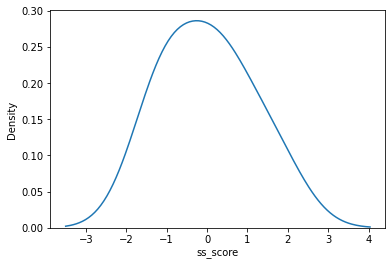

In [11]:
sns.distplot(df['ss_score'], hist=False)

## Min-Max Scaling
* 변수의 크기가 다 상대적이므로 값이 너무 작거나, 큰 경우 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을 수 있음
* 값의 범위를 0이상 1이하로 변경

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbbwd6y%2FbtqHhFhqsm2%2FRVhEkC1KKzUViTGJWYMKlK%2Fimg.png" width=150>

In [12]:
df = pd.DataFrame({"score": ["A","B","B","A","C"], "le_score":[0,1,1,0,2]})
df.head()

,score,le_score
0,A,0
1,B,1
2,B,1
3,A,0
4,C,2


In [13]:
vmin = np.min([0,1,1,0,2])
vmax = np.max([0,1,1,0,2])
(1-vmin) / (vmax - vmin)

0.5

In [14]:
mm = MinMaxScaler() 
mm.fit(df['le_score'].values.reshape(-1,1))
mm_res = mm.transform(df['le_score'].values.reshape(-1,1))
mm_res

array([[0. ],
       [0.5],
       [0.5],
       [0. ],
       [1. ]])

# for 문 이용

In [15]:
scaler_list = [ ("mm_scaler",MinMaxScaler()) , ("rb_scaler",RobustScaler()), ("ss_scaler",StandardScaler()) ]
for (nm, obj) in scaler_list:
    print(nm, obj)

mm_scaler MinMaxScaler()
rb_scaler RobustScaler()
ss_scaler StandardScaler()


In [21]:
scaler_list = [ ("mm_scaler",MinMaxScaler()) , ("rb_scaler",RobustScaler()), ("ss_scaler",StandardScaler()) ]
for (nm, scaler) in scaler_list:
    #       scaler.fit      (df['le_score'].values.reshape(-1,1))
    # res = scaler.transform(df['le_score'].values.reshape(-1,1))
    res = scaler.fit_transform(df['le_score'].values.reshape(-1,1))  #---Train Test가 합쳐져서 스케일을 각각 안해도 되는 경우
    df[nm] = res
    # pd.concat([df, res], axis=1)
df.head()    

,score,le_score,mm_scaler,rb_scaler,ss_scaler
0,A,0,0.0,-1.0,-1.069045
1,B,1,0.5,0.0,0.267261
2,B,1,0.5,0.0,0.267261
3,A,0,0.0,-1.0,-1.069045
4,C,2,1.0,1.0,1.603567


# <font color=red><b> 주의사항
*  범주형(A,B,C --> 1,2,3 ) 데이터는 숫자로 되있는 값일지라도 스케일링 금지
* train 에 fit(), transform() , test에 fit(), transform() 절대 금지
* test에는 transform()만 주의주의주의주의주의주의주의주의주의주의주의주의

In [17]:
X_train = list(range(0,11))
X_test= list(range(0,6))
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
X_train , X_test

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]))

In [18]:
mm = MinMaxScaler()
mm.fit(X_train)
res = mm.transform(X_train)
res


array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [19]:
res = mm.transform(X_test)
res

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

# 아래 절대 안된다.. 5가 1이되는 상황이 발생
* test는 train에서 사용한 fit()을 그데로 사용
* train 시 5는  0.5였다

In [20]:
mm.fit(X_test)
res = mm.transform(X_test)
res

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])